# Basic Quantum Theory, Observables and Measurements

### Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [2]:
import numpy as np

def observable_probability(state_vector, target_position):
    total_amplitude = np.sum(np.abs(state_vector) ** 2)
    
    if target_position in state_vector:
        return (np.abs(target_position) ** 2) / total_amplitude
    
    return None

def transition_probability(state1, state2):
    normalized_state1 = normalize_vector(state1)
    normalized_state2 = normalize_vector(state2)
    bra = normalized_state1.T.conj()
    inner_product = np.dot(bra, normalized_state2)
    
    return np.abs(inner_product) ** 2

def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    return vector / norm

def quantum_experiment():
    psi = np.array([complex(-3, -1), complex(0, -2), complex(0, -1), 2])
    x_2 = complex(0, -1)
    print(f"Probability of finding the particle at position x2 in {psi}: {observable_probability(psi, x_2)}")

    phi = np.array([complex(1, 1), complex(0, 1), complex(2, 4), complex(-1, 3)])
    print(f"Transition probability from {psi} to {phi}: {transition_probability(psi, phi)}")

quantum_experiment()


Probability of finding the particle at position x2 in [-3.-1.j  0.-2.j  0.-1.j  2.+0.j]: 0.05263157894736842
Transition probability from [-3.-1.j  0.-2.j  0.-1.j  2.+0.j] to [ 1.+1.j  0.+1.j  2.+4.j -1.+3.j]: 0.28708133971291866


### Complete los retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [1]:
import numpy as np

def compute_transition_amplitude(state1, state2):
    normalized_state1 = normalize_vector(state1)
    normalized_state2 = normalize_vector(state2)
    bra = normalized_state1.T.conj()
    return np.dot(bra, normalized_state2)

def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    return vector / norm

def compute_transition_probability(state1, state2):
    return np.abs(compute_transition_amplitude(state1, state2)) ** 2

def quantum_example():
    psi = (np.sqrt(2) / 2) * np.array([1, complex(0, 1)])
    phi = (np.sqrt(2) / 2) * np.array([complex(0, 1), -1])
    
    print(f"The probability of transitioning is: {compute_transition_probability(psi, phi)}")

quantum_example()


The probability of transitioning is: 1.0000000000000004


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [3]:
import numpy as np

def is_hermitian(matrix):
    return np.allclose(matrix, np.array(matrix).T.conj())

def compute_expected_value(observable, ket):
    return np.dot(np.dot(observable, ket), np.array(ket).T.conj())

def compute_variance(observable, ket):
    delta_operator = observable - (compute_expected_value(observable, ket) * np.eye(len(observable)))
    return np.dot(np.array(ket).T.conj(), np.dot(np.dot(delta_operator, delta_operator), ket))

def quantum_analysis():
    omega = np.array([[1, complex(0, -1)], [complex(0, 1), 2]])
    ket = np.array([np.sqrt(2)/2, complex(0, np.sqrt(2)/2)])
    
    if is_hermitian(omega):
        value = compute_expected_value(omega, ket)
        var = compute_variance(omega, ket)
        print(f"The expected value from omega and ket is: {value}. And the variance is: {var}")

quantum_analysis()


The expected value from omega and ket is: (2.5000000000000004+0j). And the variance is: (0.25+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [5]:
import numpy as np

def compute_transition_amplitude(state1, state2):
    normalized_state1 = normalize_vector(state1)
    normalized_state2 = normalize_vector(state2)
    return np.dot(normalized_state1.T.conj(), normalized_state2)

def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    return vector / norm

def compute_transition_probability(state1, state2):
    return np.abs(compute_transition_amplitude(state1, state2)) ** 2

def is_hermitian(matrix):
    return np.allclose(matrix, np.array(matrix).T.conj())

def compute_observable_eigenvalues(observable):
    if is_hermitian(observable):
        eigen_values, eigen_vectors = np.linalg.eigh(observable)
        return eigen_values, eigen_vectors
    return None, None

def compute_eigenvalues_probabilities(eigen_vectors, ket):
    return [compute_transition_probability(vector, ket) for vector in eigen_vectors] if eigen_vectors is not None else []

def quantum_example():
    observable = np.array([[-1, complex(0,-1)], [complex(0,1), 1]])
    ket = (1/2) * np.array([1, 1])
    eigen_values, eigen_vectors = compute_observable_eigenvalues(observable)
    probabilities = compute_eigenvalues_probabilities(eigen_vectors, ket)
    
    print(f"The eigenvalues of the observable are: {eigen_values}.")
    print(f"The probabilities of transitioning from the eigenvectors to the ket state are: {list(map(float, probabilities))}")

quantum_example()


The eigenvalues of the observable are: [-1.41421356  1.41421356].
The probabilities of transitioning from the eigenvectors to the ket state are: [0.8535533905932735, 0.1464466094067262]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [6]:
import numpy as np

def apply_dynamics(unitary_transformations, initial_state):
    final_state = initial_state
    for transformation in unitary_transformations:
        final_state = np.dot(transformation, final_state)
    return final_state

def format_complex_numbers(vector):
    return [f"{num.real} + {num.imag}j" if num.imag > 0 else f"{num.real}" if num.imag == 0 else f"{num.real} - {-num.imag}j" for num in vector]

def quantum_evolution():
    initial_state = np.array([1, 0, 0, 0])
    transformation1 = (1 * np.sqrt(2)) * np.array([[0, 1, 1, 0],
                                                    [complex(0, 1), 0, 0, 1],
                                                    [1, 0, 0, complex(0, 1)],
                                                    [0, 1, -1, 0]])
    transformation2 = np.array([[0, 1, complex(1, -1), -1],
                                [-1, complex(1, -1), 1, 0],
                                [1, complex(-1, 1), -1, 0],
                                [0, -1, complex(-1, 1), 1]])
    transformations = [transformation1, transformation2]
    final_state = apply_dynamics(transformations, initial_state)
    
    print(f"The final state of the system is: {format_complex_numbers(final_state)}")

quantum_evolution()


The final state of the system is: ['1.4142135623730951', '2.8284271247461903 + 1.4142135623730951j', '-2.8284271247461903 - 1.4142135623730951j', '-1.4142135623730951']


### Realice los siguientes problemas e incluyalos como ejemplos
Modele en su librería los problemas

4.3.1. Find all the possible states the system described in Exercise 4.2.2
can transition into after a measurement has been carried out.

In [7]:
import numpy as np

def normalize(array):
    norm = np.linalg.norm(array) 
    return array / norm

def transition_amplitude(first_array, second_array):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    return np.dot(bra, second_array_normalized)

def transition_probability(first_array, second_array):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def is_hermitian(matrix):
    return np.allclose(matrix, np.array(matrix).T.conj())

def observable_eigen_values(observable):
    if is_hermitian(observable):
        return np.linalg.eigh(observable)
    return None, None

def calculate_transition_probabilities(initial_state, eigen_vectors):
    return [transition_probability(initial_state, vec) for vec in eigen_vectors]

def quantum_spin_transition():
    spin_up = np.array([1, 0])
    Sx = np.array([[0, 1], [1, 0]])
    transformed_state = np.dot(Sx, spin_up)
    eigen_values, eigen_vectors = observable_eigen_values(Sx)

    if eigen_vectors is not None:
        probabilities = list(map(float, calculate_transition_probabilities(transformed_state, eigen_vectors)))
        for vec, prob in zip(eigen_vectors.T, probabilities):
            print(f"The probability of transitioning from {transformed_state} to {vec} is: {prob}")

quantum_spin_transition()


The probability of transitioning from [0 1] to [-0.70710678  0.70710678] is: 0.5000000000000001
The probability of transitioning from [0 1] to [0.70710678 0.70710678] is: 0.5000000000000001


4.3.2 Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

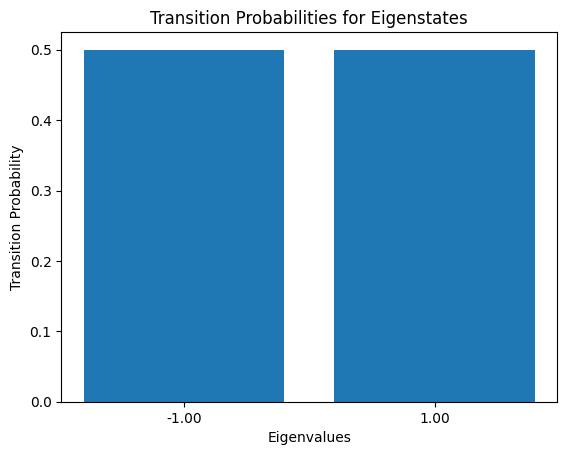

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(array):
    norm = np.linalg.norm(array)
    return array / norm

def transition_amplitude(first_array, second_array):
    first_array_normalized = normalize(first_array)
    second_array_normalized = normalize(second_array)
    bra = first_array_normalized.T.conj()
    return np.dot(bra, second_array_normalized)

def transition_probability(first_array, second_array):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def is_hermitian(matrix):
    return np.allclose(matrix, np.array(matrix).T.conj())

def observable_eigen_values(observable):
    if is_hermitian(observable):
        return np.linalg.eigh(observable)
    return None, None

def calculate_transition_probabilities(initial_state, eigen_vectors):
    return [transition_probability(initial_state, vec) for vec in eigen_vectors.T]

def plot_eigenvalue_probabilities(eigen_values, probabilities):
    plt.bar(range(len(eigen_values)), probabilities, tick_label=[f"{val:.2f}" for val in eigen_values])
    plt.xlabel("Eigenvalues")
    plt.ylabel("Transition Probability")
    plt.title("Transition Probabilities for Eigenstates")
    plt.show()

def quantum_spin_transition():
    spin_up = np.array([1, 0])
    Sx = np.array([[0, 1], [1, 0]])
    transformed_state = np.dot(Sx, spin_up)
    eigen_values, eigen_vectors = observable_eigen_values(Sx)

    if eigen_vectors is not None:
        probabilities = list(map(float, calculate_transition_probabilities(transformed_state, eigen_vectors)))
        plot_eigenvalue_probabilities(eigen_values, probabilities)

quantum_spin_transition()


4.4.1. Verify that
$$ U_1 =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \quad \text{and} \quad
U_2 =
\begin{pmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}
\end{pmatrix} $$
are unitary matrices. Multiply them and verify that their product is also unitary.



In [10]:
import numpy as np

def is_unitary(matrix):
    matrix = np.array(matrix)
    return np.allclose(np.dot(matrix.T.conj(), matrix), np.eye(matrix.shape[0]))

def format_matrix(matrix):
    return "[" + ", ".join(["[" + ", ".join(map(str, row)) + "]" for row in matrix]) + "]"

def main():
    U1 = np.array([[0, 1],
                   [1, 0]])
    
    U2 = (np.sqrt(2) / 2) * np.array([[1, 1],
                                      [1, -1]])
    
    multiplication = np.dot(U1, U2)
    matrices = [("U1", U1), ("U2", U2), ("U1 * U2", multiplication)]

    for name, matrix in matrices:
        status = "unitary" if is_unitary(matrix) else "not unitary"
        print(f"{name} = {format_matrix(matrix)} is {status}.")

main()


U1 = [[0, 1], [1, 0]] is unitary.
U2 = [[0.7071067811865476, 0.7071067811865476], [0.7071067811865476, -0.7071067811865476]] is unitary.
U1 * U2 = [[0.7071067811865476, -0.7071067811865476], [0.7071067811865476, 0.7071067811865476]] is unitary.


4.4.2. Go back to Example 3.3.2 (quantum billiard ball), keep the same
initial state vector [1, 0, 0, 0]T, but change the unitary map to
\begin{pmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0\\
\frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
\end{pmatrix}

Determine the state of the system after three time steps. What is the chance of
the quantum ball to be found at point 3

In [12]:
import numpy as np

def ket_norm(array):
    return np.sum(np.abs(array) ** 2)

def normalize(array):
    norm = np.linalg.norm(array)
    return array / norm if norm != 0 else array

def position_probability(array, position):
    return (np.abs(array[position]) ** 2) / ket_norm(array)

def main():
    A = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0], 
                  [complex(0, 1)/np.sqrt(2), 0, 0, 1/np.sqrt(2)], 
                  [1/np.sqrt(2), 0, 0, complex(0, 1)/np.sqrt(2)],
                  [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])
    
    initial_state = np.array([1, 0, 0, 0])
    
   
    final_state = np.linalg.matrix_power(A, 3) @ initial_state
    
    
    probability = position_probability(normalize(final_state), 2)
    
    print(f"The probability of finding the quantum ball at point 3 is: {probability:.6f}")

main()


The probability of finding the quantum ball at point 3 is: 0.000000
